## Part 1: Linear regression models in 1D

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.style.use("seaborn") # style for plotting that comes from seaborn
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## 2.1 Create a dataset without noise from the $f(x)=x\cdot \sin (x)$ function. 
Different y from what was done in class, create the dataset as follows:
Randomly sample 40 points from $f(x)$ within the defined domain ($x\in \left [ 0,10 \right ] $).

* After sampling the points, sort them in ascending order (from smaller to larger $x$).

 * Save the dataset as a pandas dataframe and create (in the “docs” folder) a corresponding file called “Noiseless dataset.csv”.

 * Split the dataset in two sets (training and testing sets) using the “train test split” function of scikit-learn and consider 80\% of the data is included in the training set. Set the “random state” seed to a particular value and mention in the report the value of the seed.

* Important: make sure that you use the same training and testing sets for fitting all models for this question as well as the remaining ones.

In [2]:
def f(x):
    return x * np.sin(x)

n_data = 40 
seed=2022
np.random.seed(seed)
x_data = np.random.uniform(0, 10, n_data) 
x_data=sorted(x_data)
y_data = np.zeros_like(x_data) 
i = 0 
for x_i in x_data:
    y_data[i] = f(x_i)
    i += 1
import pandas as pd 
input_dictionary = {
            'x' : x_data, # vector with input values of x
            'y' : y_data, # vector with output values of y
            }

df = pd.DataFrame(input_dictionary)
df.to_csv("docs/Noiseless_dataset.csv")

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                    y_data, test_size=0.2,
                                    random_state=seed)

## 2.2 Calculate the $R^2$ and MSE on the testing set 

after training Linear Regression models with polynomials of different degree (1, 3, 5, 10, 20) using three different training set sizes (respectively with the first 6, 11 and 21 points of the training set defined in 2.1). Present the previously mentioned error metrics as suggested in Table 1 and show 3 figures with the plots considering 6, 11 and 21 training points (one figure per row of the table). What can you conclude from these results?

When ntrain = 6 ,degree = 1 , MSE for polynomial =  11.348784640315174 , R2 for polynomial =  -0.01740952100601123
When ntrain = 6 ,degree = 3 , MSE for polynomial =  13.811171746332306 , R2 for polynomial =  -0.23816056752465342
When ntrain = 6 ,degree = 5 , MSE for polynomial =  7.245613330112229 , R2 for polynomial =  0.3504365250357304
When ntrain = 6 ,degree = 10 , MSE for polynomial =  10089.244482640393 , R2 for polynomial =  -903.4927471732013
When ntrain = 6 ,degree = 20 , MSE for polynomial =  1272228.9471060487 , R2 for polynomial =  -114053.31371805466
When ntrain = 11 ,degree = 1 , MSE for polynomial =  11.710638952379167 , R2 for polynomial =  -0.049849472417474505
When ntrain = 11 ,degree = 3 , MSE for polynomial =  8.754890591914162 , R2 for polynomial =  0.2151310183526356
When ntrain = 11 ,degree = 5 , MSE for polynomial =  0.2881296655127505 , R2 for polynomial =  0.9741694045426165
When ntrain = 11 ,degree = 10 , MSE for polynomial =  0.0007243245943012406 , R2 for 

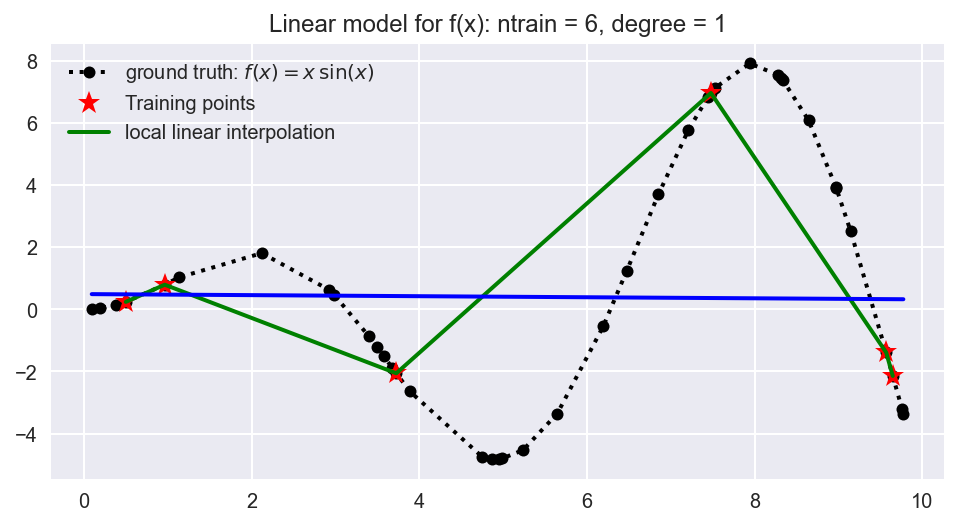

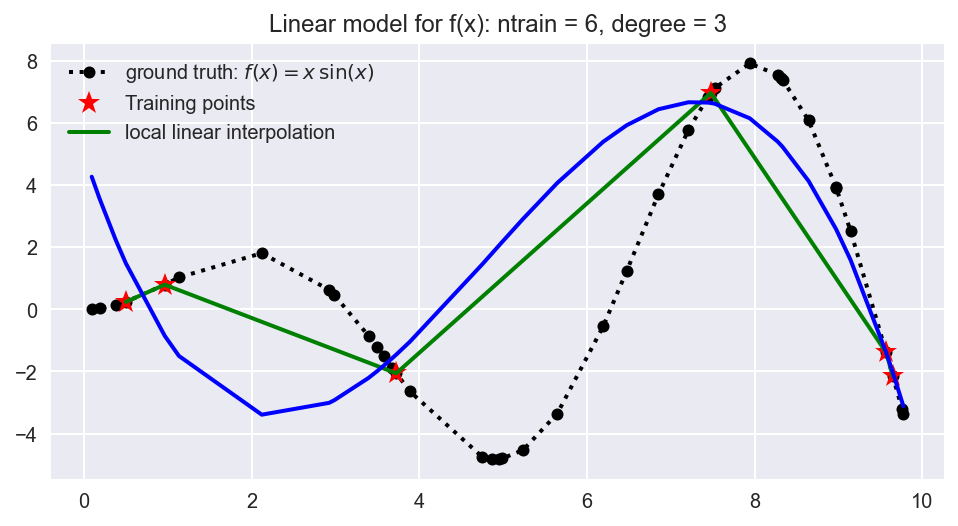

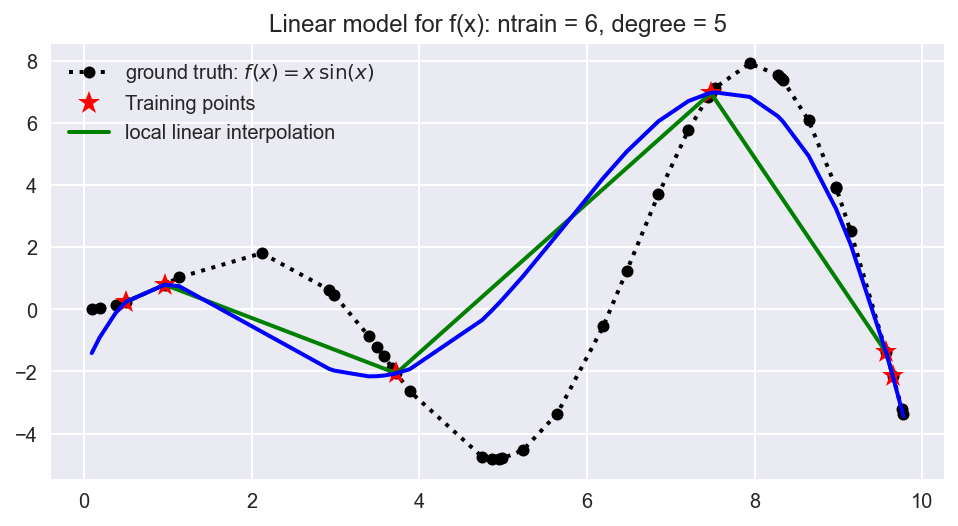

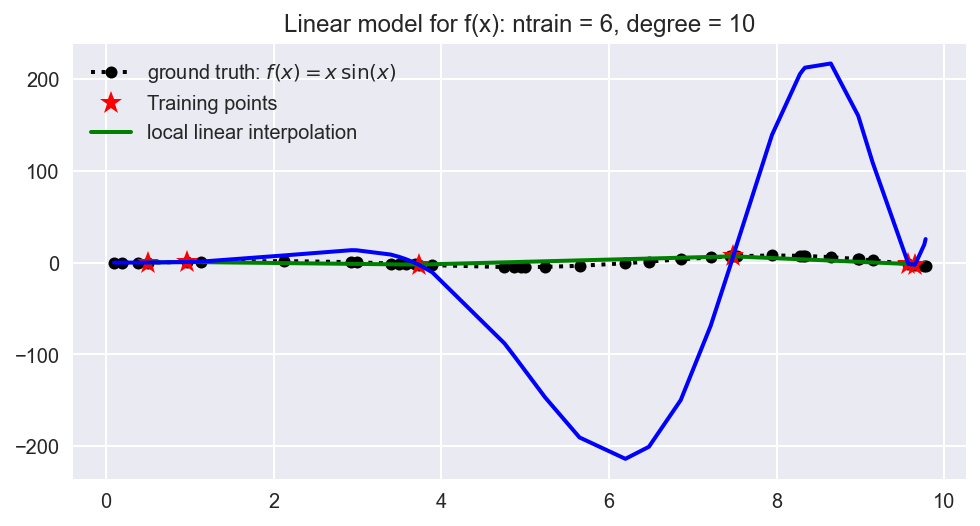

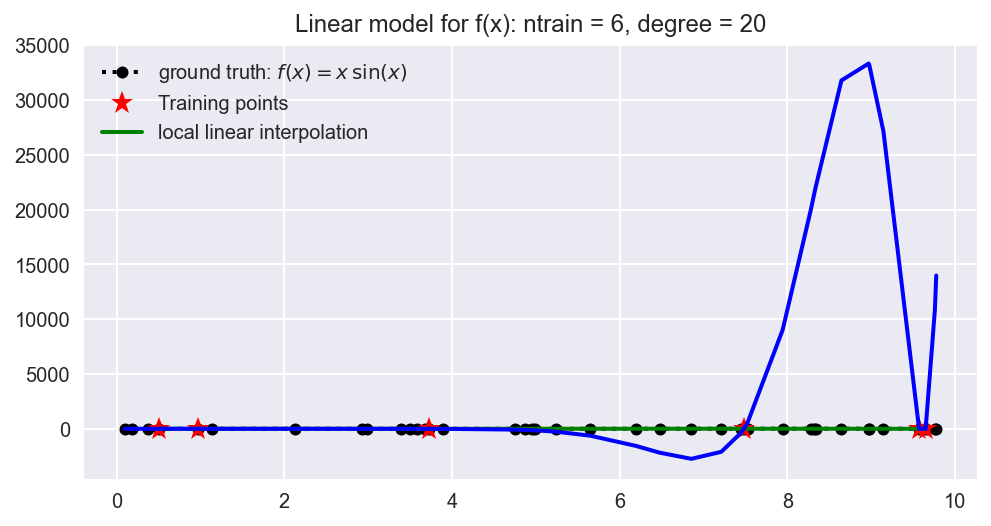

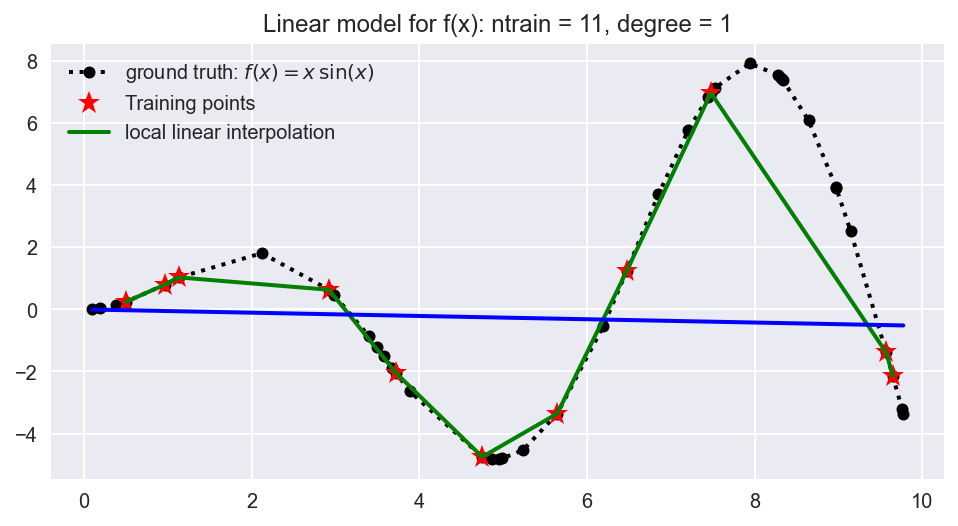

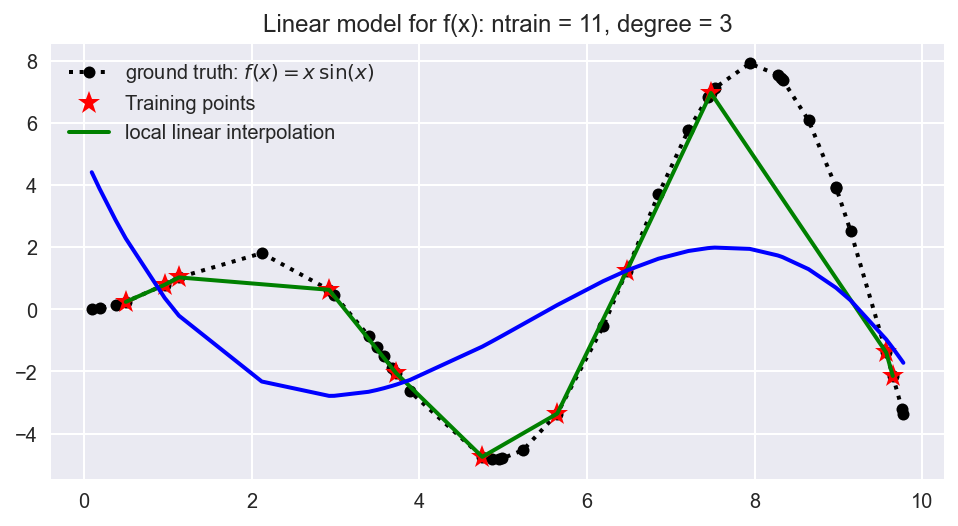

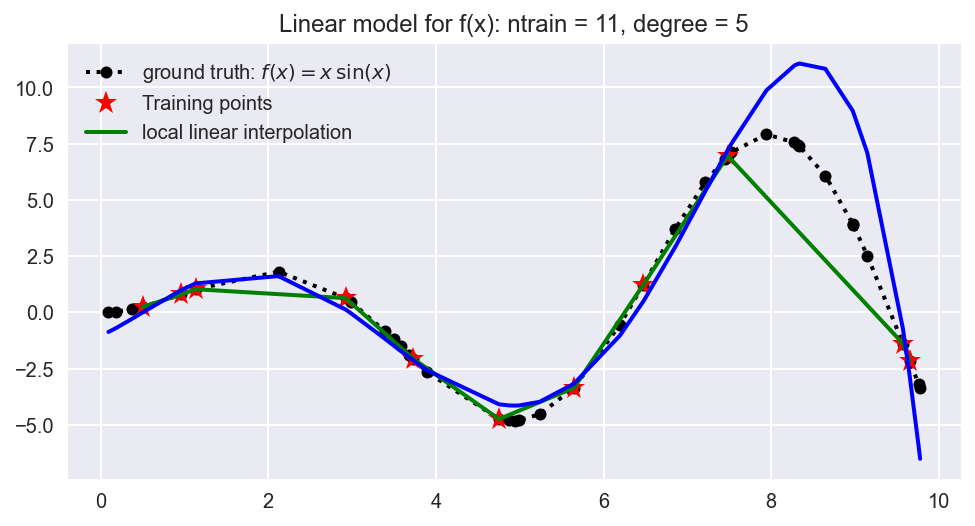

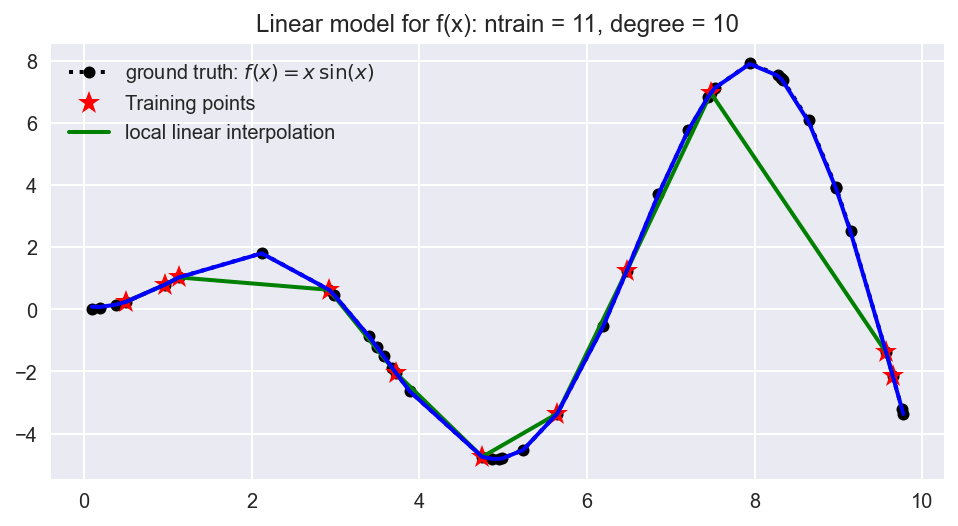

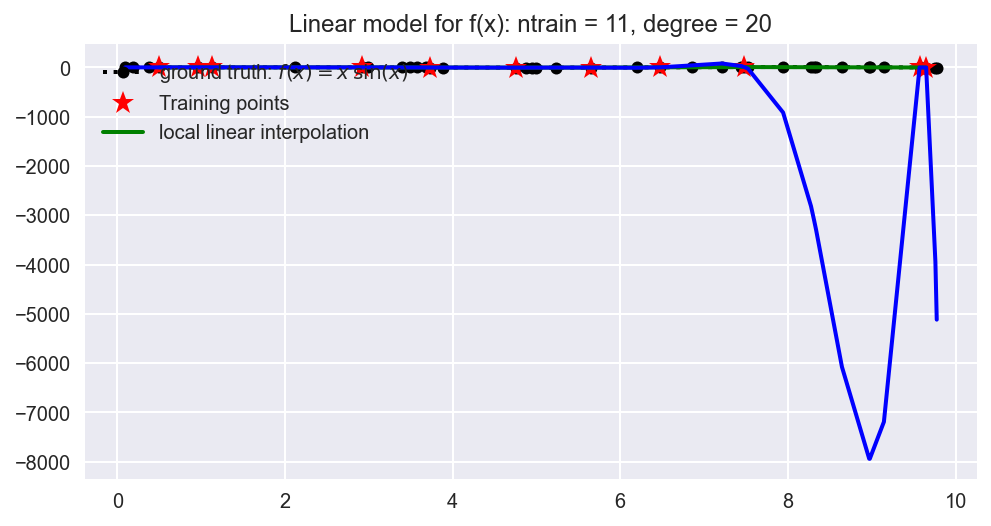

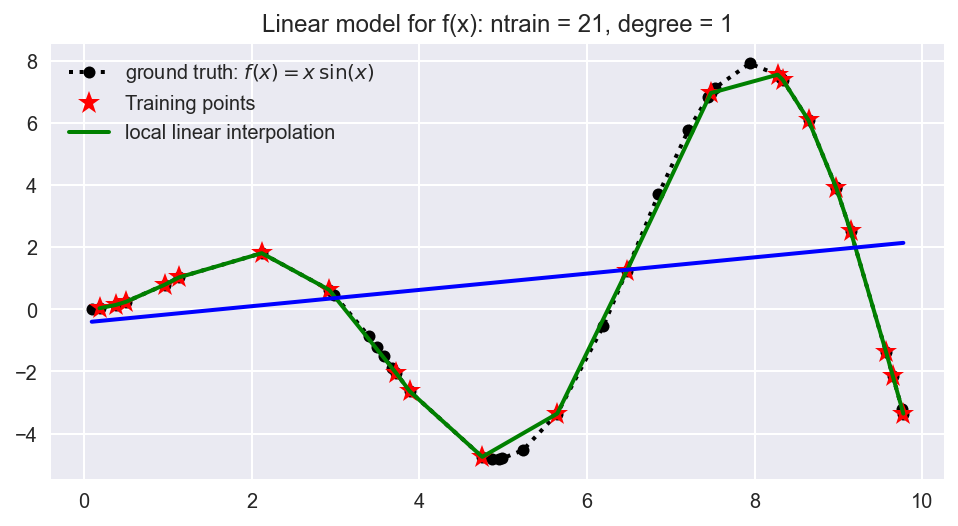

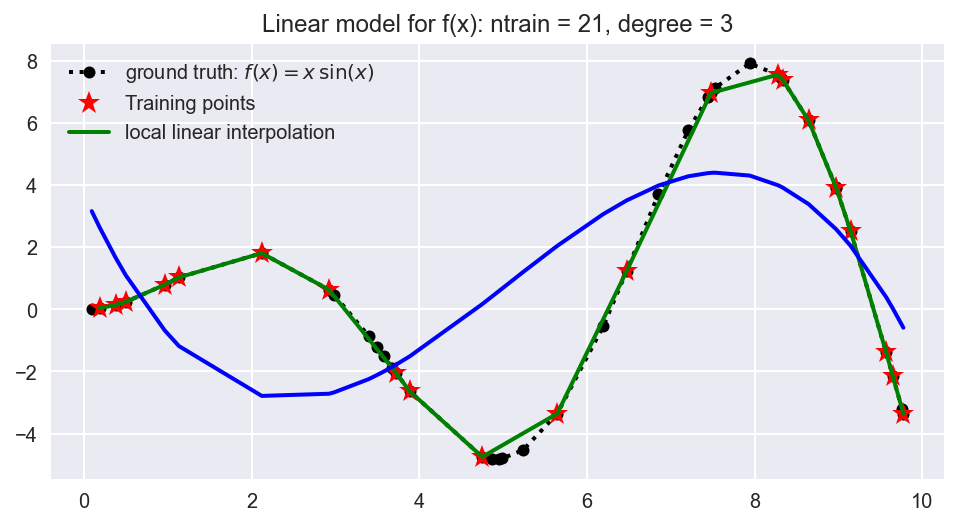

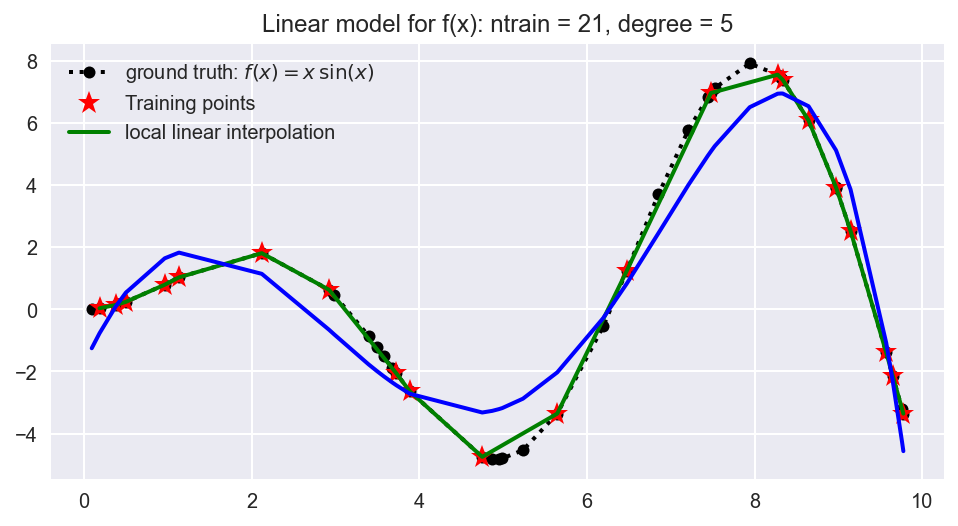

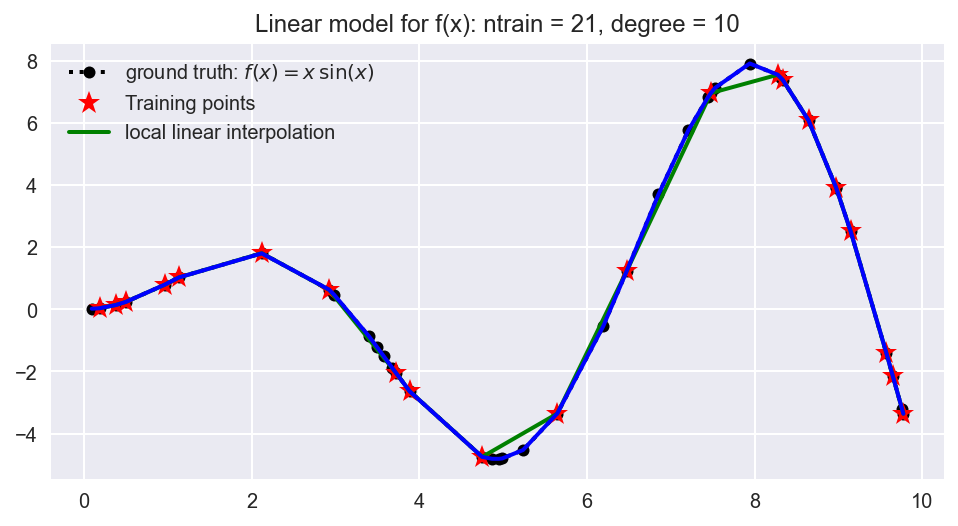

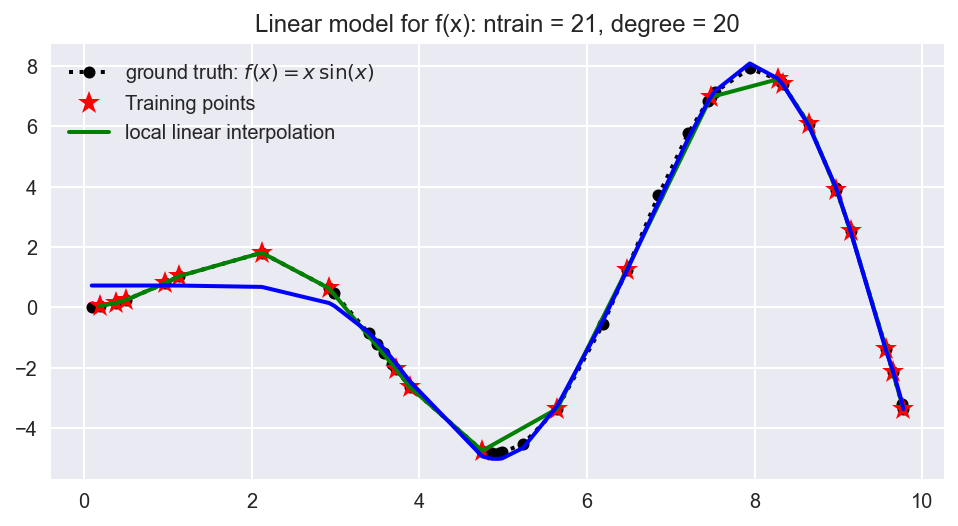

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

def r2andmse(n_train,degree):
    X_train=np.zeros(n_train)
    for i in range(n_train):
        X_train[i]=x_train[i]
    
    X_train=sorted(X_train)
    Y_train=f(X_train)
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
    X_train_1 = np.reshape(X_train, (-1, 1)) 
    poly_model.fit(X_train_1,Y_train) 


    fig1, ax1 = plt.subplots()
    ax1.plot(x_data, y_data, 'ko:', markersize=6, linewidth=2,label=u'ground truth: $f(x) = x\,\sin(x)$')
    ax1.plot(X_train, Y_train, 'r*', markersize=12,label="Training points") 
    ax1.plot(X_train, Y_train, 'g-', linewidth=2, label=u'local linear interpolation') 
    ax1.legend(loc='upper left') 
    
    X_test = np.reshape(x_test,(-1,1))
    y_test_poly = poly_model.predict(X_test)

    X_data = np.reshape(x_data, (-1, 1)) 
    y_pred = poly_model.predict(X_data) 

    ax1.plot(x_data, y_pred, 'b-', linewidth=2, label="Polynomial of degree %d prediction" % degree)
    plt.title('Linear model for f(x): ntrain = %d, degree = %s' %(n_train,degree))
    mse_value = mean_squared_error(y_test, y_test_poly)
    r2_value = r2_score(y_test, y_test_poly)
    print('When ntrain =',n_train, ',degree =', degree,', MSE for polynomial = ', mse_value, ', R2 for polynomial = ', r2_value)

r2andmse(6,1)
r2andmse(6,3)
r2andmse(6,5)
r2andmse(6,10)
r2andmse(6,20)
r2andmse(11,1)
r2andmse(11,3)
r2andmse(11,5)
r2andmse(11,10)
r2andmse(11,20)
r2andmse(21,1)
r2andmse(21,3)
r2andmse(21,5)
r2andmse(21,10)
r2andmse(21,20)

## 2.3 Now consider the entire training set defined in 2.1 and use 6-fold cross validation 
calculate the mean and standard deviation of the R2 and MSE metrics when training Linear Regression models with polynomials of different degree (1, 5, 20). Present the result as suggested in Table 2. Explain the obtained mean and standard deviation for the error metrics.

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

def cv(degree):
    mse_scores=[]
    r2_scores=[]
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
    kf=KFold(n_splits=6)
    for train_index, test_index in kf.split(x_train):
        x1_data=np.array(x_train)
        y1_data=np.array(y_train)
        X_train, X_test, y1_train, y_test = x1_data[train_index], x1_data[test_index], y1_data[train_index], y1_data[test_index]
        poly_model.fit(np.reshape(X_train,(-1,1)), y1_train)
        y_test_pred=poly_model.predict(np.reshape(X_test,(-1,1)))
        mse_scores.append(mean_squared_error(y_test,y_test_pred))
        r2_scores.append(r2_score(y_test,y_test_pred))
        #r2_scores.append(cross_val_score(poly_model, np.reshape(x_data,(-1,1)), y_data, scoring='r2', cv=kf))
        #mse_scores.append(-cross_val_score(poly_model, np.reshape(x_data,(-1,1)), y_data, scoring='neg_mean_squared_error', cv=kf))
    
    mean_mse=np.mean(mse_scores)
    std_mse=np.std(mse_scores)
    mean_r2=np.mean(r2_scores)
    std_r2=np.std(r2_scores)

    #print(r2_scores)
    print('When degree = %s, the mean for mean squared error for the 6 fold cross validation =%s, stand deviation = %s' %(degree,mean_mse,std_mse))
    print('When degree = %s, the mean for r2 error for the 6 fold cross validation =%s, stand deviation = %s' %(degree,mean_r2,std_r2))

cv(1)
cv(5)
cv(20)

When degree = 1, the mean for mean squared error for the 6 fold cross validation =17.30431414942921, stand deviation = 6.790858395675152
When degree = 1, the mean for r2 error for the 6 fold cross validation =-0.3193348965366389, stand deviation = 0.3790126045881437
When degree = 5, the mean for mean squared error for the 6 fold cross validation =1.7698405133477906, stand deviation = 0.37320447052732036
When degree = 5, the mean for r2 error for the 6 fold cross validation =0.8427623298783987, stand deviation = 0.08121360107906458
When degree = 20, the mean for mean squared error for the 6 fold cross validation =0.16436320552825742, stand deviation = 0.1482375539085995
When degree = 20, the mean for r2 error for the 6 fold cross validation =0.9778758101594217, stand deviation = 0.024962796065784033


## 3.1 Linear regression model for dataset with noise

From the dataset you created in 2.1, perturb the output values of each point with noise. Consider
the same type of noise used in Lecture 9

* Once you generated the new dataset (same x values but perturbed y values), save it as a pandas dataframe and create (in the “docs” folder) a corresponding file called “Noisy dataset.csv”.

* As before, split the dataset in two sets (training and testing sets) using the “train test split” function of scikit-learn and consider 80\% of the data is included in the training set. Set the “random state” seed to the same value you used in 2.1.

In [5]:
seed = 2022 
np.random.seed(seed)
random_std = 0.5 + 1.0 * np.random.random(y_data.shape) 
noise = np.random.normal(0, random_std) 
y_noisy_data = y_data + noise 

Y_noisy_data = np.column_stack((y_noisy_data,noise))
Noisy_data = {
            'x' : x_data, 
            'y_noisy' : y_noisy_data, 
            'noise': noise
            }

Noisy_dataset = pd.DataFrame(Noisy_data)
#print("The noisy dataset is:",'\n',Noisy_dataset,'\n')
Noisy_dataset.to_csv("docs/Noisy_dataset.csv")

X_data = np.reshape(x_data,(-1,1))
x_train, x_test, y_train, y_test = train_test_split(X_data,
                                    y_noisy_data, test_size=0.20,
                                    random_state=seed)


## 3.2 Calculate the $R^2$ and MSE on the testing set 

after training Linear Regression models with polynomials of different degree (1, 3, 5, 10, 20) using three different training set sizes (respectively with the first 6, 11 and 21 points of the training set defined in 2.1). Present the previously mentioned error metrics as suggested in Table 1 and show 3 figures with the plots considering 6, 11 and 21 training points (one figure per row of the table). What can you conclude from these results?

When ntrain = 21 ,degree = 20 , MSE for polynomial =  1.7956979331442688 , R2 for polynomial =  0.8530055796611691


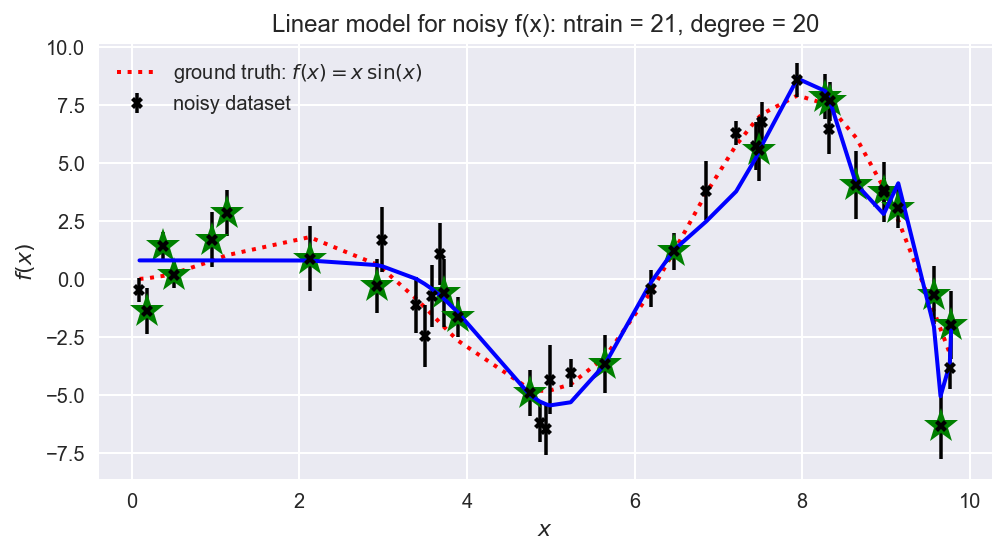

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

def r2andmse(n_train,degree):
    X_train=np.zeros(n_train)
    Y_train=np.zeros(n_train)
    for i in range(n_train):
        X_train[i]=x_train[i]
        Y_train[i]=y_train[i]

    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
    X_train_1 = np.reshape(X_train, (-1, 1)) 
    poly_model.fit(X_train_1,Y_train) 
    fig2, ax2 = plt.subplots() 
    ax2.plot(x_data, y_data, 'r:', linewidth=2,label=u'ground truth: $f(x) = x\,\sin(x)$')
    plt.errorbar(x_data, y_noisy_data, random_std, fmt='kX',markersize=6, label=u'noisy dataset')
    ax2.set_xlabel('$x$') 
    ax2.set_ylabel('$f(x)$') 
    ax2.legend(loc='upper left') 
    ax2.plot(X_train, Y_train, 'g*', markersize=18, label="Training points") # Markers locating training points
    
    X_test = np.reshape(x_test,(-1,1))
    y_test_poly = poly_model.predict(X_test)

    X_data = np.reshape(x_data, (-1, 1)) 
    y_pred = poly_model.predict(X_data) 

    ax2.plot(x_data, y_pred, 'b-', linewidth=2, label="Polynomial of degree %d prediction" % degree)
    plt.title('Linear model for noisy f(x): ntrain = %d, degree = %s' %(n_train,degree))
    mse_value = mean_squared_error(y_test, y_test_poly)
    r2_value = r2_score(y_test, y_test_poly)
    print('When ntrain =',n_train, ',degree =', degree,', MSE for polynomial = ', mse_value, ', R2 for polynomial = ', r2_value)

r2andmse(21,20)

## 3.3 Now consider the entire training set and use 6-fold cross validation 
calculate the mean and standard deviation of the R2 and MSE metrics when training Linear Regression models with polynomials of different degree (1, 5, 20). Present the result as suggested in Table 2. Explain the obtained mean and standard deviation for the error metrics.

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

def cv(degree):
    mse_scores=[]
    r2_scores=[]
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
    kf=KFold(n_splits=6)
    for train_index, test_index in kf.split(x_train):
        x1_data=np.array(x_train)
        y1_data=np.array(y_train)
        X_train, X_test, y1_train, y1_test = x1_data[train_index], x1_data[test_index], y1_data[train_index], y1_data[test_index]
        poly_model.fit(np.reshape(X_train,(-1,1)), y1_train)
        y_test_pred=poly_model.predict(np.reshape(X_test,(-1,1)))
        mse_scores.append(mean_squared_error(y1_test,y_test_pred))
        r2_scores.append(r2_score(y1_test,y_test_pred))
        #r2_scores.append(cross_val_score(poly_model, np.reshape(x_data,(-1,1)), y_data, scoring='r2', cv=kf))
        #mse_scores.append(-cross_val_score(poly_model, np.reshape(x_data,(-1,1)), y_data, scoring='neg_mean_squared_error', cv=kf))
    
    mean_mse=np.mean(mse_scores)
    std_mse=np.std(mse_scores)
    mean_r2=np.mean(r2_scores)
    std_r2=np.std(r2_scores)

    print('When degree = %s, the mean for mean squared error for the 6 fold cross validation =%s, stand deviation = %s' %(degree,mean_mse,std_mse))
    print('When degree = %s, the mean for r2 error for the 6 fold cross validation =%s, stand deviation = %s' %(degree,mean_r2,std_r2))

cv(1)
cv(5)
cv(20)

When degree = 1, the mean for mean squared error for the 6 fold cross validation =18.80220951310477, stand deviation = 9.045517512903753
When degree = 1, the mean for r2 error for the 6 fold cross validation =-0.35926546811927534, stand deviation = 0.4379218209052848
When degree = 5, the mean for mean squared error for the 6 fold cross validation =3.4226604819256927, stand deviation = 1.512306825868791
When degree = 5, the mean for r2 error for the 6 fold cross validation =0.7190109743246387, stand deviation = 0.16301535912206563
When degree = 20, the mean for mean squared error for the 6 fold cross validation =3.9425049742771203, stand deviation = 2.9223574463863207
When degree = 20, the mean for r2 error for the 6 fold cross validation =0.5741025882091305, stand deviation = 0.377710032545929


## 3.5 Repeat 2.2. but now using Ridge Regression with hyperparameter $\alpha = 10^{−4}$. 
What happens when you use a bigger or smaller value of α?

When ntrain = 21 ,degree = 5 , MSE for polynomial =  3.5753779206845664 , R2 for polynomial =  0.7073223757500098


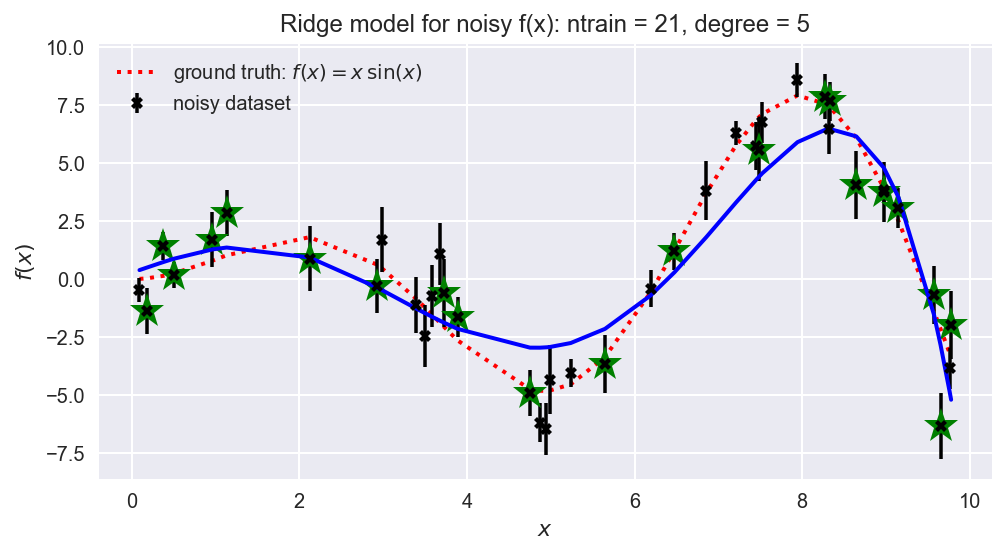

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 

def ridger2andmse(n_train,deg):
    alpha=1
    model=Ridge(alpha=alpha)
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_train=np.zeros(n_train)
    Y_train=np.zeros(n_train)
    for i in range(n_train):
        X_train[i]=x_train[i]
        Y_train[i]=y_train[i]

    Xtrain_poly = poly_features.fit_transform(X_train.reshape(-1,1))
    model.fit(Xtrain_poly, Y_train)
    Xtest_poly = poly_features.transform(x_test)
    ytest_pred = model.predict(Xtest_poly)
    
    fig3, ax3 = plt.subplots() 
    ax3.plot(x_data, y_data, 'r:', linewidth=2,label=u'ground truth: $f(x) = x\,\sin(x)$')
    plt.errorbar(x_data, y_noisy_data, random_std, fmt='kX',markersize=6, label=u'noisy dataset')
    ax3.set_xlabel('$x$') 
    ax3.set_ylabel('$f(x)$') 
    ax3.legend(loc='upper left') 
    ax3.plot(X_train, Y_train, 'g*', markersize=18, label="Training points") # Markers locating training points
    
    X_data = np.reshape(x_data, (-1, 1)) 
    Xdata_poly = poly_features.transform(X_data)
    y_pred = model.predict(Xdata_poly) 
    
    ax3.plot(x_data, y_pred, 'b-', linewidth=2, label="Polynomial of degree %d prediction" % deg)
    plt.title('Ridge model for noisy f(x): ntrain = %d, degree = %s' %(n_train,deg))
    mse_value = mean_squared_error(y_test, ytest_pred)
    r2_value = r2_score(y_test, ytest_pred)
    print('When ntrain =',n_train, ',degree =', deg,', MSE for polynomial = ', mse_value, ', R2 for polynomial = ', r2_value)


ridger2andmse(21,5)


When ntrain = 6 ,degree = 3 , MSE for polynomial =  17.725354900008938 , R2 for polynomial =  -0.45098360962335526